In [1]:
import pandas as pd
import numpy as np

data is taken from kagglehub

In [2]:
df = pd.read_csv("../data/heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
len(df.columns)

12

number of columns 12

number of rows 918

In [7]:
df.shape

(918, 12)

data overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


check stats

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


check duplicate 

In [10]:
df.columns.unique()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
len(df.columns.unique())

12

In [12]:
df.duplicated().sum()

0

no row columns duplicate

In [13]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

check null value 

In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

no null value

check numerical and categorical columns

In [15]:
num_col = [feature for feature in df.columns if df[feature].dtype != 'O']

In [16]:
num_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [17]:
cat_col = [feature for feature in df.columns if df[feature].dtype == "O"]

In [18]:
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [19]:
{col :[df[col].unique()] for col in cat_col}

{'Sex': [array(['M', 'F'], dtype=object)],
 'ChestPainType': [array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)],
 'RestingECG': [array(['Normal', 'ST', 'LVH'], dtype=object)],
 'ExerciseAngina': [array(['N', 'Y'], dtype=object)],
 'ST_Slope': [array(['Up', 'Flat', 'Down'], dtype=object)]}

no noisy data in cat columns

In [20]:
{col :[df[col].unique()] for col in num_col}

{'Age': [array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
         56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
         29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
        dtype=int64)],
 'RestingBP': [array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
         145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
          92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
         116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
         102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
         129, 164], dtype=int64)],
 'Cholesterol': [array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
         234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
         188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
         264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
         342,

no noisy data in num columns

check imbalancy

In [21]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

small imbalancy by aprox 100 rows

check outliers for num columns

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

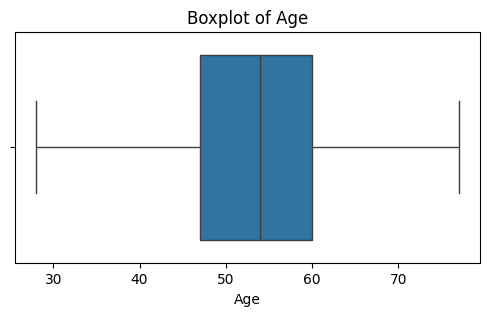

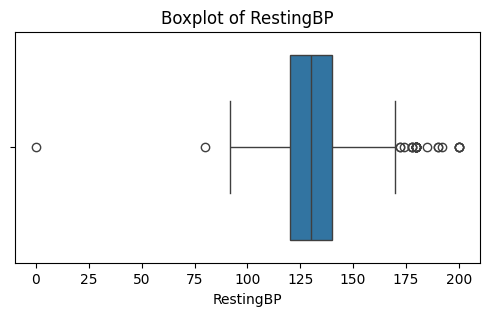

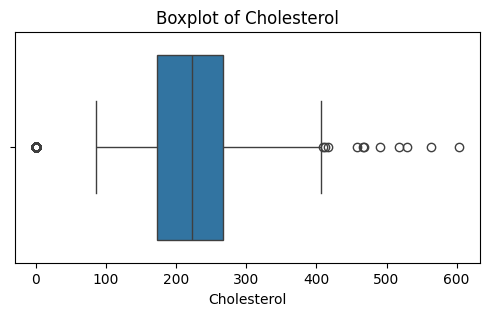

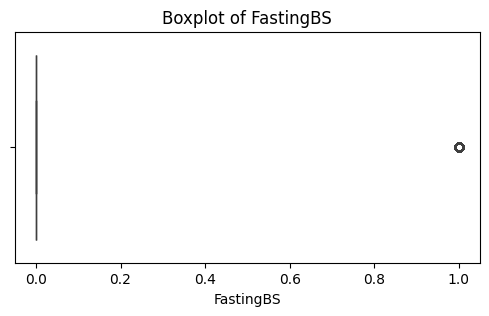

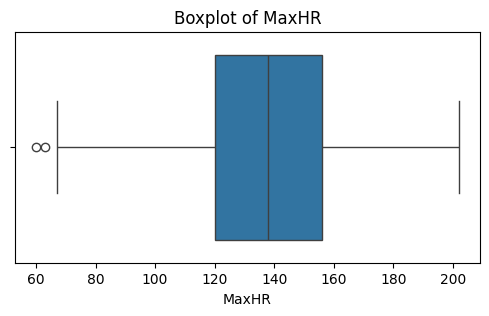

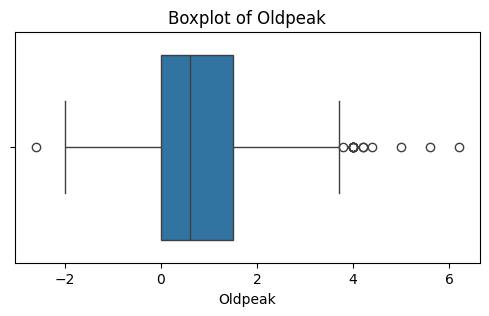

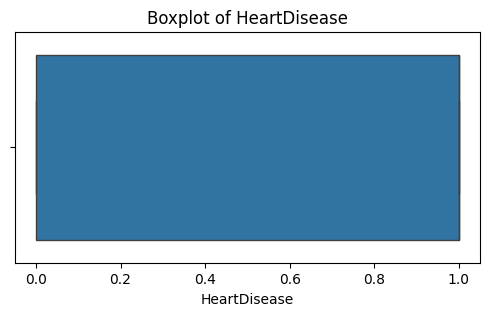

In [24]:

for col in num_col:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

There are some outliers in some features columns , we can remove outliers for better model but as this is a health related data so we need to be careful and discuss with domain expertise

In [37]:

def displot(col):
    sns.displot(df[col],kde=True)
    plt.show()

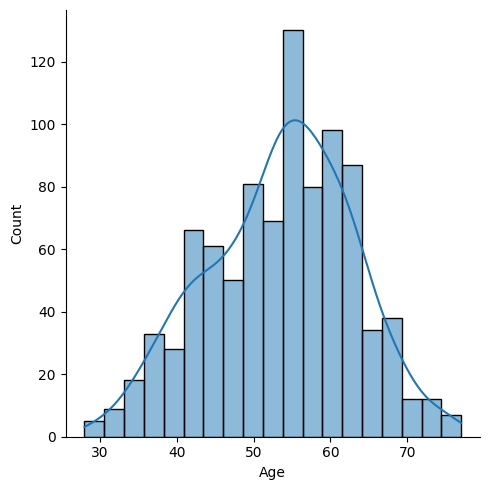

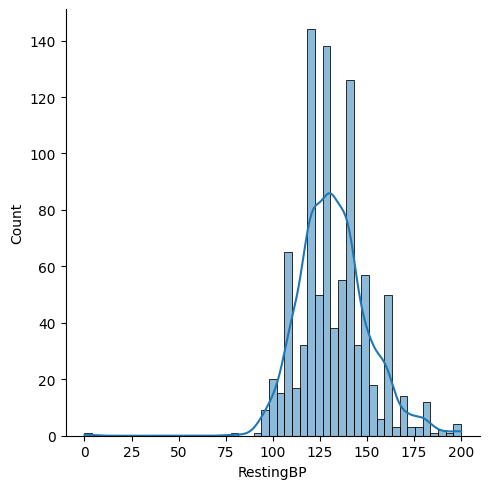

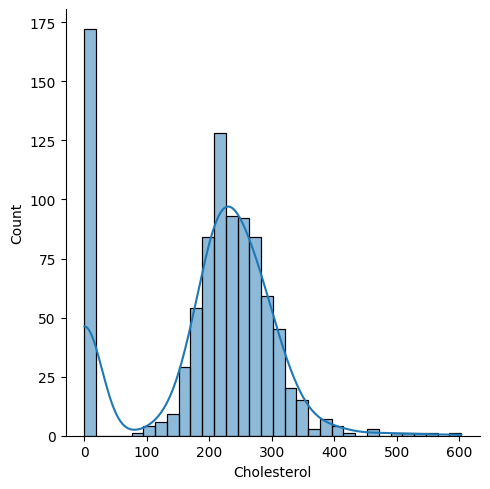

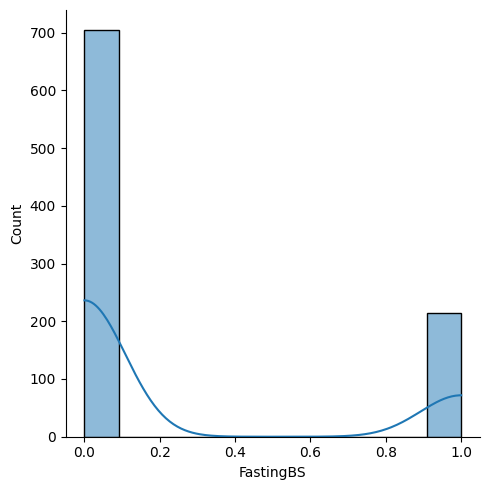

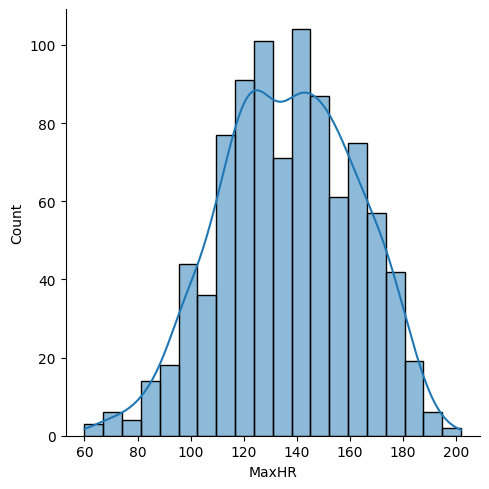

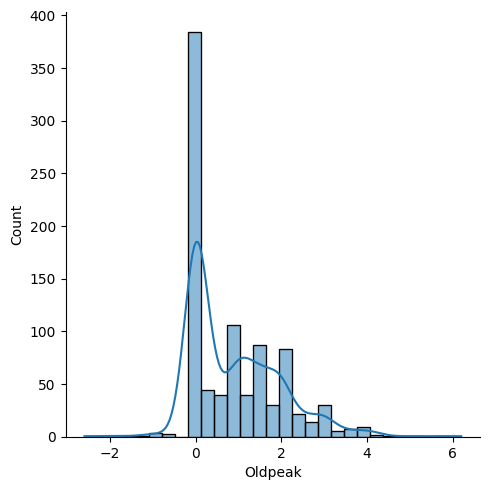

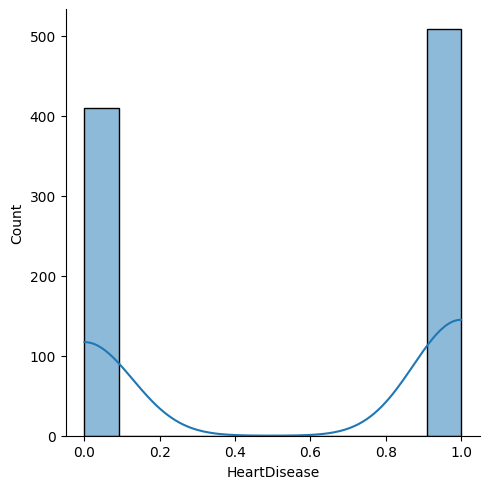

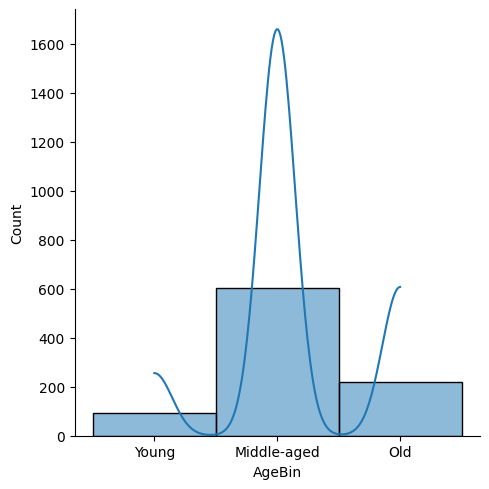

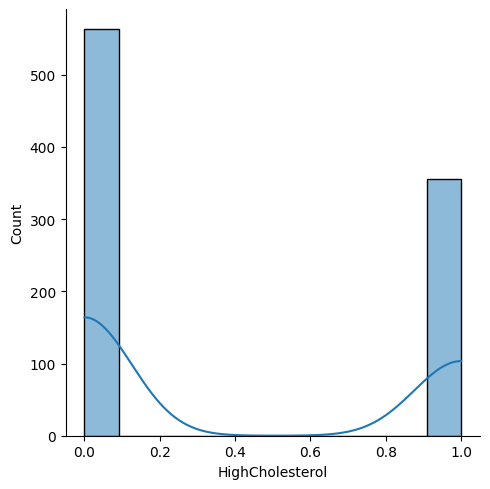

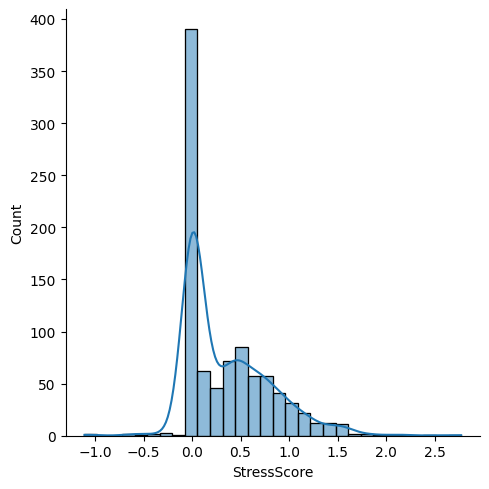

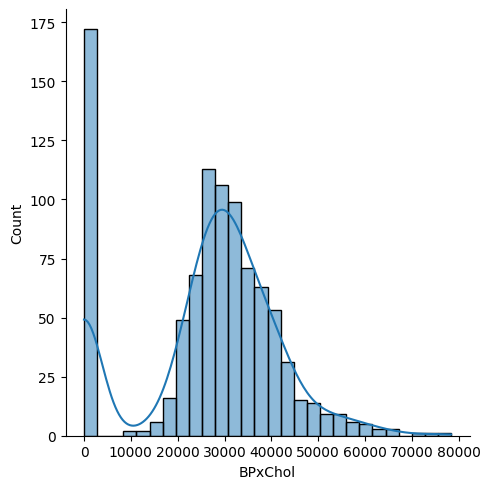

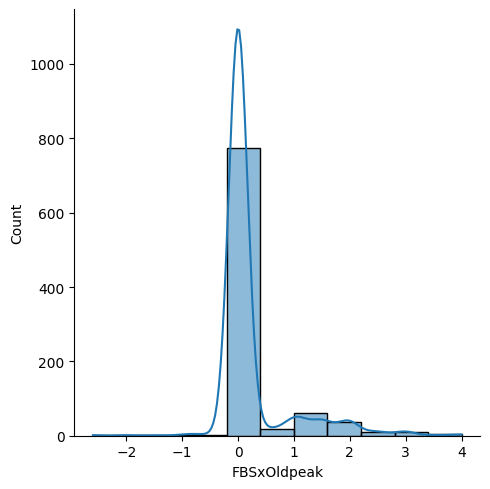

In [38]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    displot(i)

In [25]:
outliers_ = {}

In [26]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    print(f"Column '{col}' has {outliers_mask.sum()} outliers.")
    
    outliers_[col] = [lower_bound, upper_bound]

Column 'Age' has 0 outliers.
Column 'RestingBP' has 28 outliers.
Column 'Cholesterol' has 183 outliers.
Column 'FastingBS' has 214 outliers.
Column 'MaxHR' has 2 outliers.
Column 'Oldpeak' has 16 outliers.
Column 'HeartDisease' has 0 outliers.


to see the number of outliers in 'Cholesterol' and 'FastingBS' I think they are important


In [27]:
outliers_

{'Age': [27.5, 79.5],
 'RestingBP': [90.0, 170.0],
 'Cholesterol': [32.625, 407.625],
 'FastingBS': [0.0, 0.0],
 'MaxHR': [66.0, 210.0],
 'Oldpeak': [-2.25, 3.75],
 'HeartDisease': [-1.5, 2.5]}

### Features Engineering

check correlation in num columns

In [28]:
df[num_col].corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


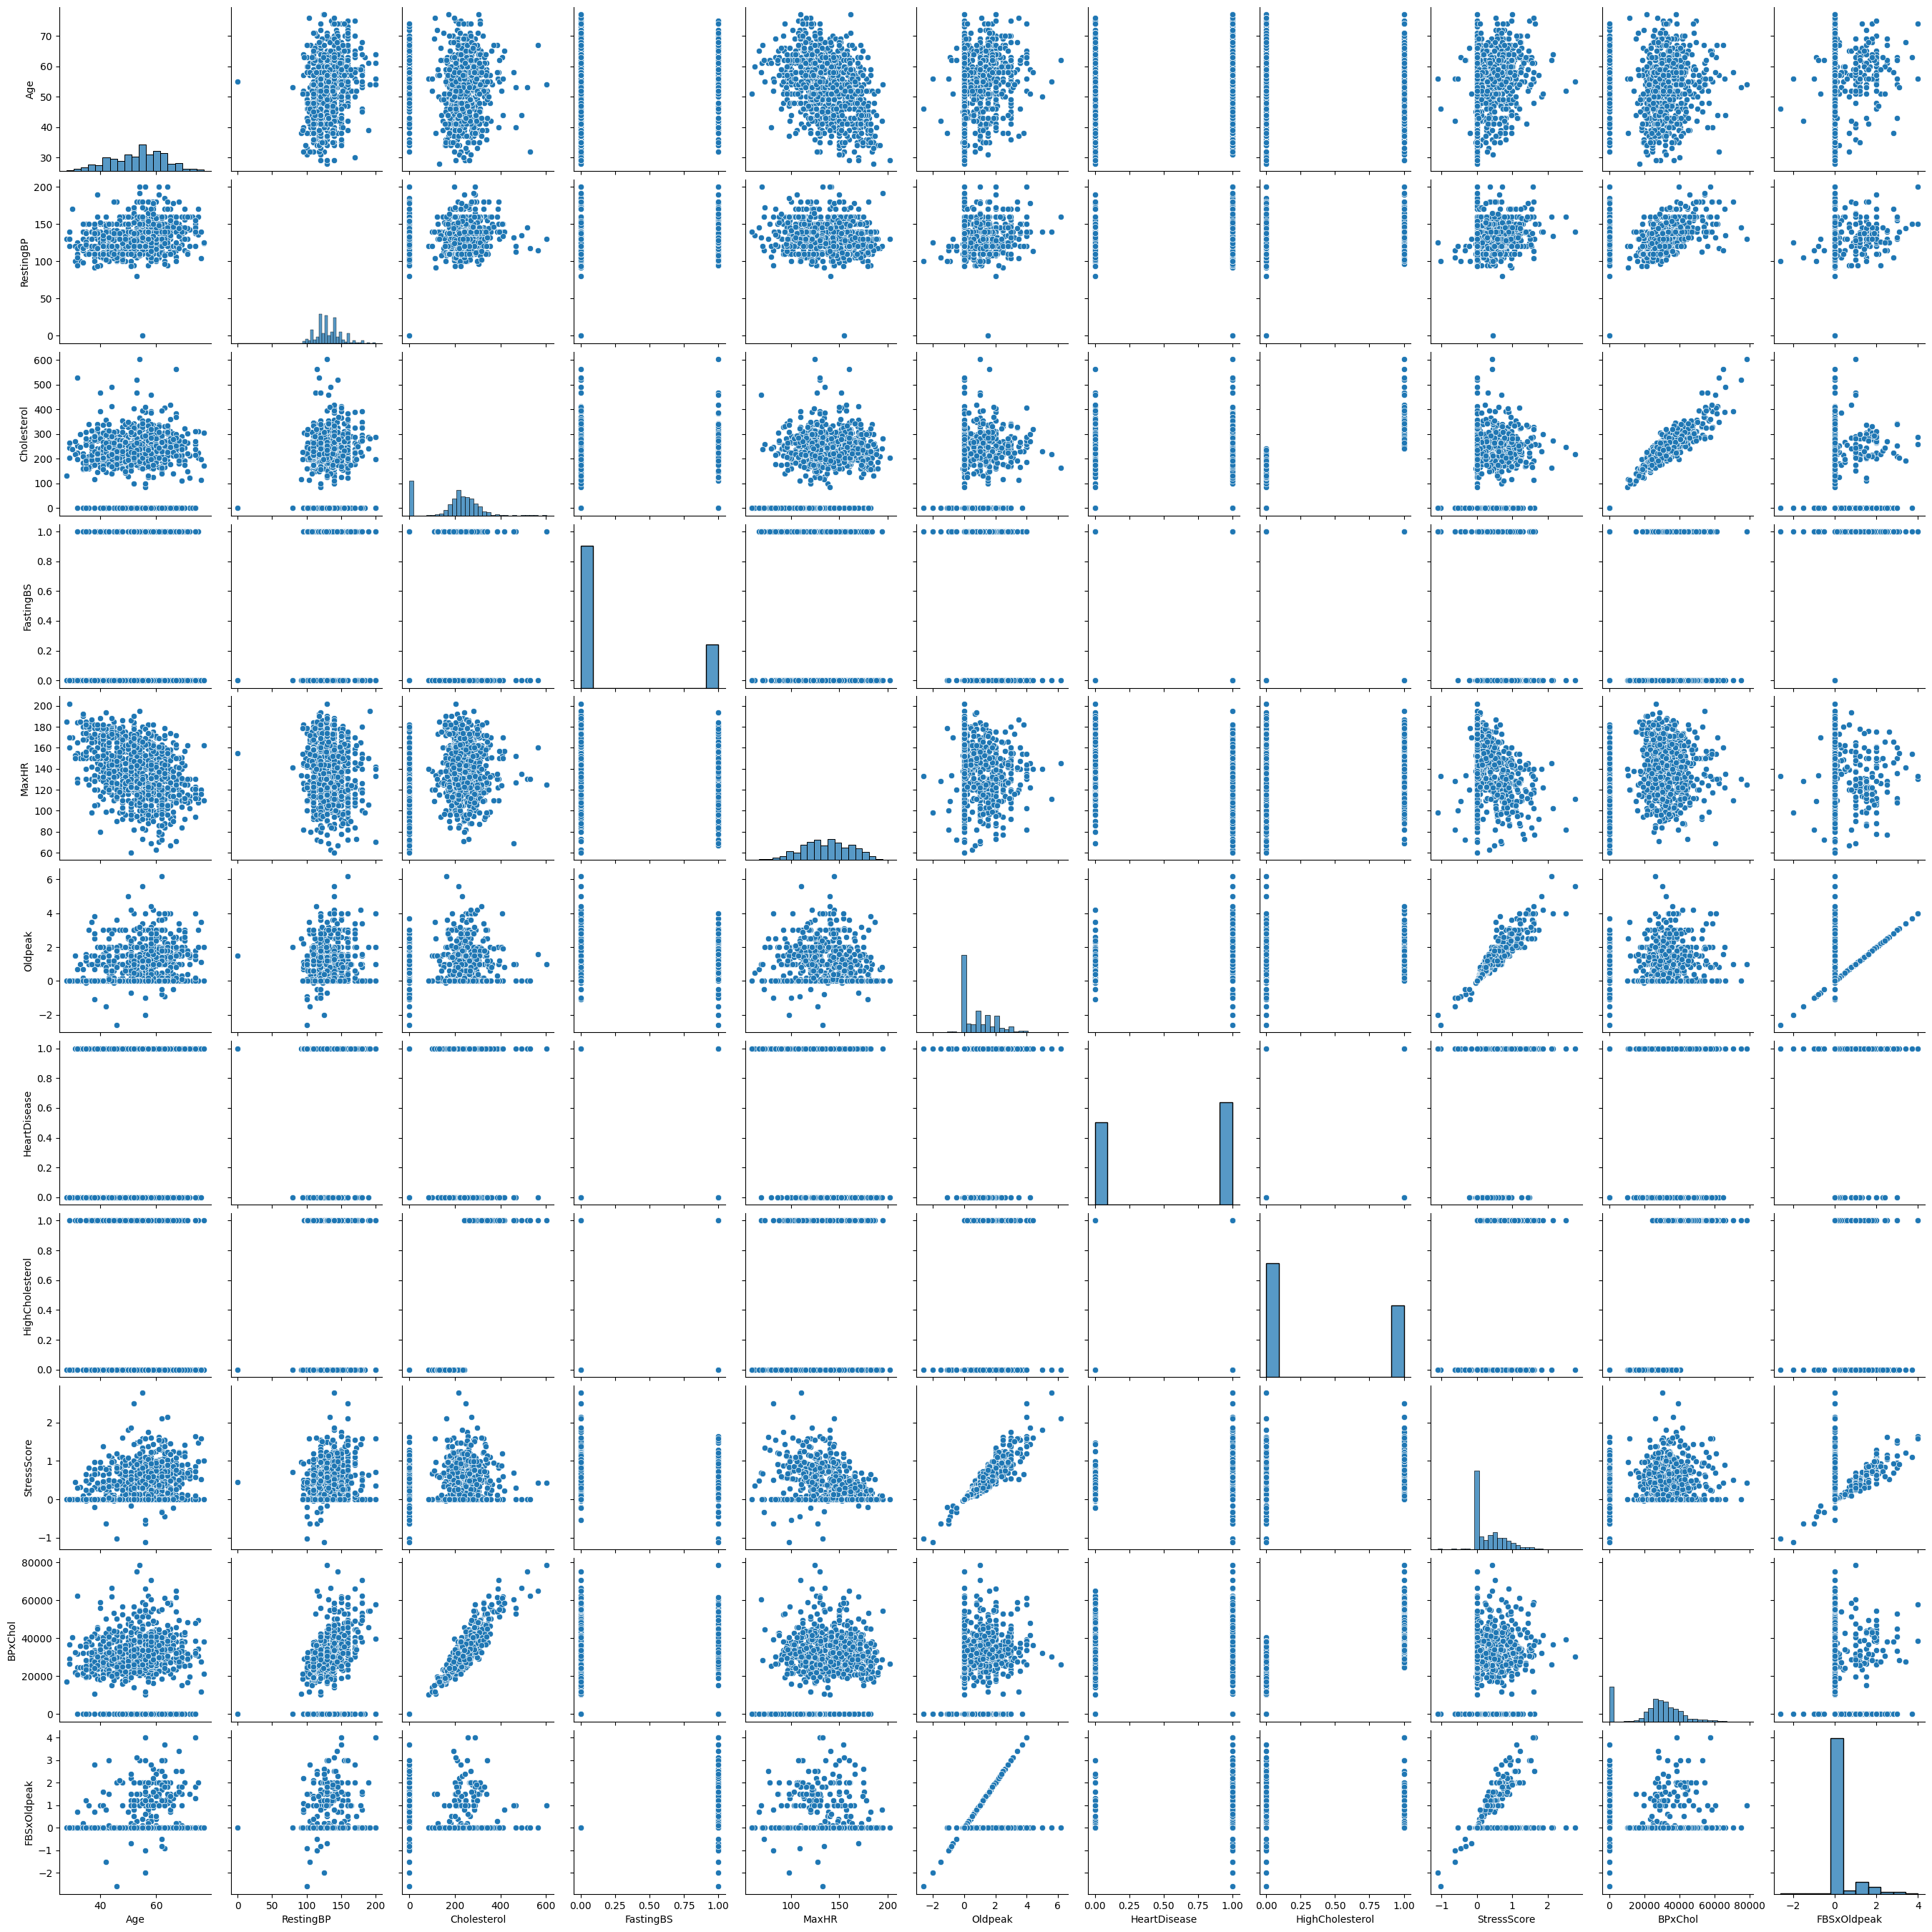

In [36]:
sns.pairplot(df)

<Axes: >

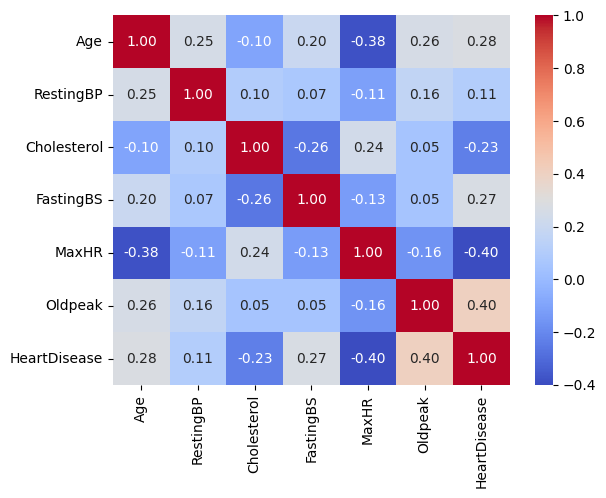

In [29]:
sns.heatmap(df[num_col].corr(), annot=True, fmt=".2f", cmap='coolwarm')

### genai

| Feature         | Correlation with HeartDisease | Notes                                                       |
| --------------- | ----------------------------- | ----------------------------------------------------------- |
| **Oldpeak**     | **+0.403951**                 | Strongest **positive** correlation (important predictor)    |
| **MaxHR**       | **−0.400421**                 | Strong **negative** correlation (lower MaxHR → higher risk) |
| **Age**         | +0.282039                     | Moderate positive correlation                               |
| **FastingBS**   | +0.267291                     | Moderate predictor                                          |
| **Cholesterol** | **−0.232741**                 | Weak-to-moderate **inverse** correlation                    |
| **RestingBP**   | +0.107589                     | Weak positive correlation                                   |


absolute correlation ≥ 0.25 is considered a signal worth capturing.

RestingBP and Cholesterol have weak correlation with HeartDisease.

Do not remove yet, but use feature selection to confirm if they help downstream.

Multicollinearity Check

Age and Oldpeak: 0.258 → acceptable.

FastingBS and Cholesterol: -0.26 → low enough.

No pairs exceed ±0.8, so multicollinearity is not a concern yet.

can drop weakly correlated or less informative features depending on the model:

RestingBP → low correlation with target (0.10).

Cholesterol → moderately negative correlation (-0.23), might hurt more than help unless domain says otherwise.

tree-based models (e.g., XGBoost, Random Forest), they can still extract non-linear patterns even from weakly correlated features — so you choose to keep all and let the model decide.

In [30]:
import pandas as pd

def feature_engineering(df):
    # Binning Age (continuous variable to categorical)
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 40, 60, 100], labels=['Young', 'Middle-aged', 'Old'])

    # Binary transform for high cholesterol
    df['HighCholesterol'] = (df['Cholesterol'] > 240).astype(int)

    # Combine Oldpeak & MaxHR into a StressScore
    df['StressScore'] = df['Oldpeak'] * (220 - df['MaxHR']) / 220

    # Interaction features
    df['BPxChol'] = df['RestingBP'] * df['Cholesterol']
    df['FBSxOldpeak'] = df['FastingBS'] * df['Oldpeak']

    # Drop columns that are now redundant if needed
    # df = df.drop(columns=['Oldpeak', 'Cholesterol', 'RestingBP'])

    return df


In [32]:
feature_engineering(df).head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeBin,HighCholesterol,StressScore,BPxChol,FBSxOldpeak
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Young,1,0.000000,40460,0.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Middle-aged,0,0.290909,28800,0.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Young,1,0.000000,36790,0.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Middle-aged,0,0.763636,29532,0.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Middle-aged,0,0.000000,29250,0.0


Chi-Square Test for Each Categorical Column

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [35]:

# Define features and target
categorical_features = cat_col
target = 'HeartDisease'

# Label encode all categorical variables
df_encoded = df[categorical_features + [target]].copy()
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Apply Chi-Square test
X = df_encoded[categorical_features]
y = df_encoded[target]

chi_scores = chi2(X, y)

# Convert to readable format
chi2_df = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2 Score': chi_scores[0],
    'P-value': chi_scores[1]
}).sort_values(by='Chi2 Score', ascending=False)

print("Chi-Square Test Results:")
print(chi2_df)


Chi-Square Test Results:
          Feature  Chi2 Score       P-value
1   ChestPainType  160.736878  7.810009e-37
3  ExerciseAngina  133.640134  6.549289e-31
4        ST_Slope   77.486680  1.336205e-18
0             Sex   18.006243  2.201817e-05
2      RestingECG    1.218136  2.697268e-01


| Feature            | Chi2 Score | P-value  | Interpretation                              |
| ------------------ | ---------- | -------- | ------------------------------------------- |
| **ChestPainType**  | 160.74     | 7.81e-37 |  **Highly significant** – strong predictor |
| **ExerciseAngina** | 133.64     | 6.54e-31 |  **Highly significant** – strong predictor |
| **ST\_Slope**      | 77.49      | 1.34e-18 |  **Very significant**                      |
| **Sex**            | 18.01      | 2.20e-05 |  **Statistically significant**             |
| **RestingECG**     | 1.22       | 0.2697   |  **Not significant** – might be dropped   |


Interpretation


 ChestPainType, ExerciseAngina, ST_Slope, and Sex show strong association with HeartDisease (p-value < 0.05).

 RestingECG has a high p-value (0.27) — not significantly associated with the target in this dataset. It may not contribute much predictive power.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9676\1302716149.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_results, x='Chi2 Score', y='Feature', palette='viridis')


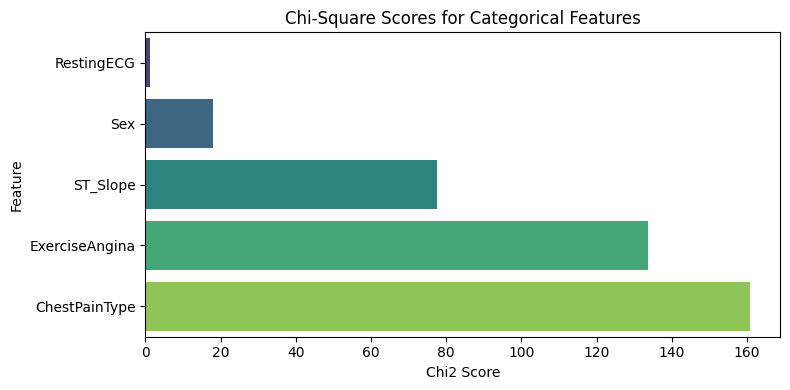

In [39]:
# Chi2 scores from earlier
chi2_results = pd.DataFrame({
    'Feature': ['ChestPainType', 'ExerciseAngina', 'ST_Slope', 'Sex', 'RestingECG'],
    'Chi2 Score': [160.736878, 133.640134, 77.486680, 18.006243, 1.218136]
})

# Sort descending
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=True)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=chi2_results, x='Chi2 Score', y='Feature', palette='viridis')
plt.title("Chi-Square Scores for Categorical Features")
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Make balance dataset

In [40]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

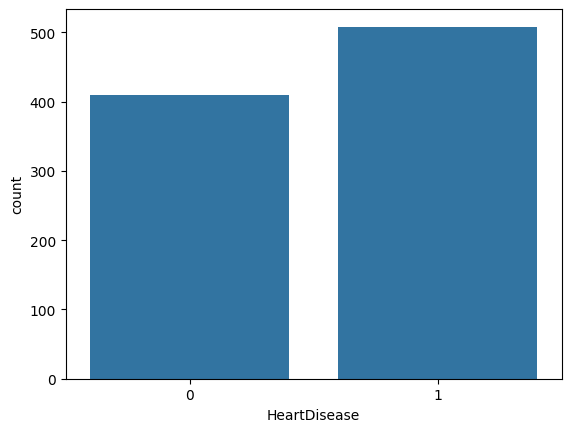

In [42]:
sns.barplot(df.HeartDisease.value_counts())

In [43]:
from sklearn.utils import resample

In [45]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeBin,HighCholesterol,StressScore,BPxChol,FBSxOldpeak
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Young,1,0.000000,40460,0.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Middle-aged,0,0.290909,28800,0.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Young,1,0.000000,36790,0.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Middle-aged,0,0.763636,29532,0.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Middle-aged,0,0.000000,29250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,Middle-aged,1,0.480000,29040,0.0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,Old,0,1.220909,27792,3.4
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,Middle-aged,0,0.572727,17030,0.0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,Middle-aged,0,0.000000,30680,0.0


Use oversampling when dataset is small.

In [46]:
# Combine X and y
df_full = df.copy()
df_full['HeartDisease'] = y

# Separate majority and minority
majority = df_full[df_full.HeartDisease == 1]
minority = df_full[df_full.HeartDisease == 0]

In [47]:
# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine
df_balanced = pd.concat([majority, minority_upsampled])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Split back
X_balanced = df_balanced.drop(columns='HeartDisease')
y_balanced = df_balanced['HeartDisease']


In [50]:
df_balanced

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeBin,HighCholesterol,StressScore,BPxChol,FBSxOldpeak
0,66,M,NAP,120,0,0,ST,120,N,-0.5,Up,0,Old,0,-0.227273,0,-0.0
1,39,M,ATA,120,241,0,ST,146,N,2.0,Up,0,Young,1,0.672727,28920,0.0
2,35,M,ASY,120,0,1,Normal,130,Y,1.2,Flat,1,Young,0,0.490909,0,1.2
3,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0,Middle-aged,1,0.000000,52884,0.0
4,57,M,NAP,150,126,1,Normal,173,N,0.2,Up,0,Middle-aged,0,0.042727,18900,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1,Old,0,0.000000,0,0.0
1012,58,M,ASY,120,0,0,LVH,106,Y,1.5,Down,1,Middle-aged,0,0.777273,0,0.0
1013,37,M,NAP,118,240,0,LVH,165,N,1.0,Flat,0,Young,0,0.250000,28320,0.0
1014,53,M,ASY,123,282,0,Normal,95,Y,2.0,Flat,1,Middle-aged,1,1.136364,34686,0.0


In [55]:
categorical_cols = df_balanced.select_dtypes(exclude="number").columns

In [56]:
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'AgeBin'],
      dtype='object')

In [57]:
numerical_cols = df_balanced.select_dtypes(include="number").columns

In [58]:
numerical_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'HighCholesterol', 'StressScore', 'BPxChol',
       'FBSxOldpeak'],
      dtype='object')

In [51]:
df_balanced.to_csv("balance_heart_data.csv")

gen ai synthesis data generation

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [76]:

X = df_balanced.drop(columns='HeartDisease')
y = df_balanced['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [66]:

numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HighCholesterol', 'StressScore', 'BPxChol',
       'FBSxOldpeak']
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'AgeBin']


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


genai

In [71]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [72]:
from lightgbm import LGBMClassifier

In [ ]:
models_params = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {
            "classifier__C": [0.01, 0.1, 1, 10],
            "classifier__penalty": ["l2"],
            "classifier__solver": ["lbfgs"]
        }
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [5, 10, None]
        }
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [3, 6]
        }
    ),
    "CatBoost": (
        CatBoostClassifier(verbose=0, random_state=42),
        {
            "classifier__depth": [4, 6],
            "classifier__learning_rate": [0.01, 0.1]
        }
    ),
    "LightGBM": (
        LGBMClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [3, 6, -1],
            "classifier__learning_rate": [0.01, 0.1]
        }
    )
}

 Why These Models?
1. Logistic Regression – 🔍 Baseline, Interpretable, Fast
Why use it?

It's a linear model, easy to interpret and explain to stakeholders.

Works well when your features and target have a linear relationship.

Fast to train, especially on large datasets.

Best for: Interpretable problems, initial benchmarking, low-complexity problems.

2. Random Forest – 🌳 Ensemble, Nonlinear, Robust
Why use it?

An ensemble of decision trees (bagging) → reduces overfitting.

Handles nonlinear relationships and interactions well.

Robust to noise and doesn't require feature scaling.

Best for: General-purpose modeling, tabular data with mixed data types, handling missing values.

3. XGBoost – ⚡ High Performance, Gradient Boosting
Why use it?

One of the most accurate and efficient models in ML competitions (e.g., Kaggle).

Implements gradient boosting, optimized for speed and performance.

Handles missing values, categorical encoding, and imbalanced data (with scale_pos_weight).

Best for: Complex problems with lots of features or interactions, tight latency-performance needs.

4. CatBoost – 🐱 Categorical-Boosting, Smart Encoding
Why use it?

Designed for datasets with categorical features (like yours).

Automatically handles encoding without needing OneHot or LabelEncoder.

Better performance on small-to-medium data compared to other gradient boosting methods.

Best for: Tabular datasets with many categorical variables, or when interpretability is needed.

❌ Why Not Other Models (in your current context)?
❌ SVM (Support Vector Machine)
Expensive to train on large datasets.

Not well suited for probability output, which is needed for ROC-AUC scoring.

Doesn’t scale well beyond thousands of examples.

❌ KNN (K-Nearest Neighbors)
Lazy learner – slow at prediction time.

Not scalable and doesn’t handle high-dimensional data well.

Needs feature scaling and has limited interpretability.

❌ Naive Bayes
Assumes feature independence, which is rarely true in real data.

Often outperformed by tree-based models.

Good baseline, but not great in complex feature interactions.

❌ Neural Networks / Deep Learning
Overkill for most tabular datasets (like structured health data).

Requires more data, tuning, and training time.

Less interpretable without tools like SHAP.

In [68]:



# Store results
results = {}

# Loop through models
for model_name, (model, params) in models_params.items():
    print(f"Training: {model_name}")
    
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    grid = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    results[model_name] = {
        "model": best_model,
        "roc_auc": roc_auc_score(y_test, y_proba),
        "accuracy": accuracy_score(y_test, y_pred),
        "report": classification_report(y_test, y_pred),
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "best_params": grid.best_params_
    }


Training: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training: RandomForest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training: XGBoost
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training: CatBoost
Fitting 5 folds for each of 4 candidates, totalling 20 fits


d:\RXprojectheart\henv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
7 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "d:\RXprojectheart\henv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\RXprojectheart\henv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\RXprojectheart\henv\Lib\site-packages\imblearn\pipeline.py", line 326, in fit
    self._final_estimator.fit(Xt, yt, 

In [69]:
# Print summary
for name, res in results.items():
    print(f"\n=== {name} ===")
    print("ROC AUC:", res['roc_auc'])
    print("Accuracy:", res['accuracy'])
    print("Best Params:", res['best_params'])
    print("Confusion Matrix:\n", res['conf_matrix'])



=== LogisticRegression ===
ROC AUC: 0.936082276047674
Accuracy: 0.9166666666666666
Best Params: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Confusion Matrix:
 [[94  8]
 [ 9 93]]

=== RandomForest ===
ROC AUC: 0.9546328335255672
Accuracy: 0.9166666666666666
Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Confusion Matrix:
 [[93  9]
 [ 8 94]]

=== XGBoost ===
ROC AUC: 0.9645328719723184
Accuracy: 0.9166666666666666
Best Params: {'classifier__max_depth': 6, 'classifier__n_estimators': 200}
Confusion Matrix:
 [[92 10]
 [ 7 95]]

=== CatBoost ===
ROC AUC: 0.9645328719723183
Accuracy: 0.9068627450980392
Best Params: {'classifier__depth': 6, 'classifier__learning_rate': 0.01}
Confusion Matrix:
 [[94  8]
 [11 91]]


In [73]:
results

{'LogisticRegression': {'model': Pipeline(steps=[('preprocess',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler())]),
                                                    ['Age', 'RestingBP',
                                                     'Cholesterol', 'FastingBS',
                                                     'MaxHR', 'Oldpeak',
                                                     'HighCholesterol',
                                                     'StressScore', 'BPxChol',
                                                     'FBSxOldpeak']),
                                                   ('cat',
                                                    Pipeline(steps=[('encoder',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
         

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


  pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

In [77]:
best_models = {}
best_score = 0
best_model_name = None
best_model_instance = None

for name, (model, param_grid) in models_params.items():
    print(f"Training and tuning: {name}")

    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)  # Make sure X_train, y_train are defined

    best_models[name] = {
        "model": grid.best_estimator_,
        "params": grid.best_params_,
        "score": grid.best_score_
    }

    print(f"Best score for {name}: {grid.best_score_:.4f}")
    
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model_name = name
        best_model_instance = grid.best_estimator_


Training and tuning: LogisticRegression
Best score for LogisticRegression: 0.8966
Training and tuning: RandomForest
Best score for RandomForest: 0.9200
Training and tuning: XGBoost
Best score for XGBoost: 0.9126
Training and tuning: CatBoost
Best score for CatBoost: 0.9163


In [78]:
print("Best Model:")
print(f"Model Name      : {best_model_name}")
print(f"Best CV Score   : {best_score:.4f}")
print(f"Best Parameters : {best_models[best_model_name]['params']}")


Best Model:
Model Name      : RandomForest
Best CV Score   : 0.9200
Best Parameters : {'classifier__max_depth': None, 'classifier__n_estimators': 100}


In [80]:
pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 544.4/544.4 kB 8.8 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)

   ---------------------------------------- 0/3 [slicer]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   

In [81]:
import shap

if "lightgbm" in best_model_name.lower():
    explainer = shap.TreeExplainer(best_model_instance.named_steps["classifier"])
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
